# T1 - Parte 3

## 3 - Regressão Logística

### 3.1 - Visualização dos dados

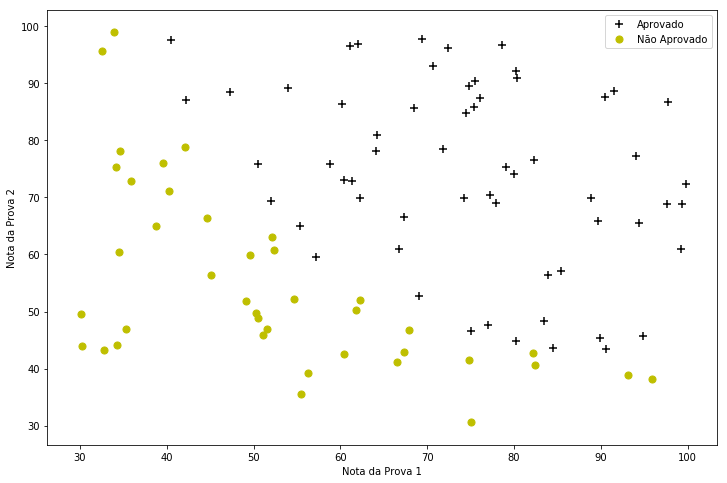

In [3]:
# Código para exibir o gráfico após execução do bloco
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# Carregando os dados do dataset e armazendo em um array.
# Em seguida damos uma rápida visualizada nos dados
data = pd.read_csv('ex2data1.txt', header=None,
                   names=['Prova 1', 'Prova 2', 'Aprovado'])
data.head()

# A primeira coluna, preenchida com 1's, represenhta o theta0
data.insert(0, 'Ones', 1)

# converte de dataframes para arrays
cols = data.shape[1]
X = data.iloc[:, 0:cols - 1]
y = data.iloc[:, cols - 1:cols]

# converte de arrays para matrizes
X = np.array(X.values)
y = np.array(y.values)
theta = np.zeros(3)

# gerando o gráfico de dispersão para análise preliminar dos dados

positivo = data[data['Aprovado'].isin([1])]
negativo = data[data['Aprovado'].isin([0])]

fig, ax = plt.subplots(figsize=(12, 8))

ax.scatter(positivo['Prova 1'], positivo['Prova 2'],
           s=50, c='k', marker='+', label='Aprovado')

ax.scatter(negativo['Prova 1'], negativo['Prova 2'],
           s=50, c='y', marker='o', label='Não Aprovado')
ax.legend()
ax.set_xlabel('Nota da Prova 1')
ax.set_ylabel('Nota da Prova 2')
plt.show()

### 3.2 - Implementação

#### 3.2.1 - Função sigmoide

In [4]:
def sigmoide(z):
    return 1.0 / (1 + np.exp(-z))

#Testando para 0
print(sigmoide(0))

#Testando para 1000
print(sigmoide(749))

#Testando para -1000
print(sigmoide(-749))

# Testando para vetor
print(sigmoide(np.array([0, 2])))

0.5
1.0
0.0
[0.5        0.88079708]


c:\users\aiqui\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


#### 3.2.2 - Função de custo e gradiente

In [5]:
def normalizar_caracteristicas(X, y):
    mean_X = np.mean(X, axis=0)
    std_X = np.std(X, axis=0)
    X_norm = (X - mean_X) / std_X

    mean_y = np.mean(y, axis=0)
    std_y = np.std(y, axis=0)
    y_norm = (y - mean_y) / std_y

    return X_norm, y_norm, mean_X, std_X, mean_y, std_y


def custo_reglog(theta, X, y):
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)
    grad0 = np.multiply(-y, np.log(sigmoide(X * theta.T)))
    grad1 = np.multiply((1 - y), np.log(1 - sigmoide(X * theta.T)))
    return np.sum(grad0 - grad1) / (len(X))


X = data.iloc[:, 1:cols - 1]
y = data.iloc[:, cols - 1:cols]

X = np.array(X.values)
y = np.array(y.values)

(examData_norm, labels_norm, mean_examData,
 std_examData, mean_labels, std_labels) = normalizar_caracteristicas(X, y)

examData_norm = np.c_[np.ones((X.shape[0], 1)), examData_norm]

theta = np.array([0, 0, 0], ndmin=2)

# Chamando essa função com examData_norm trnaposto dá erro de dimensionalidade.
# Nas chamadas a essa função na main.py enviada pelo professor ele não passa
# a matriz X como transposta
J = custo_reglog(theta, examData_norm, labels_norm)

print(J)

0.6931471805599453


#### 3.2.3 - Aprendizado de parâmetros

In [6]:
import scipy.optimize as opt
import numpy as np
import pandas as pd

def sigmoide(z):
    return 1.0 / (1 + np.exp(-z))

def custo_reglog(theta, X, y):
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)
    grad0 = np.multiply(-y, np.log(sigmoide(X * theta.T)))
    grad1 = np.multiply((1 - y), np.log(1 - sigmoide(X * theta.T)))
    return np.sum(grad0 - grad1) / (len(X))

def gd_reglog(theta, X, y):
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)

    parametros = int(theta.ravel().shape[1])
    grad = np.zeros(parametros)

    erro = sigmoide(X * theta.T) - y

    for i in range(parametros):
        term = np.multiply(erro, X[:, i])
        grad[i] = np.sum(term) / len(X)

    return grad

data = pd.read_csv('ex2data1.txt', header=None,
                   names=['Prova 1', 'Prova 2', 'Aprovado'])

# A primeira coluna, preenchida com 1's, represenhta o theta0
data.insert(0, 'Ones', 1)

# converte de dataframes para arrays
cols = data.shape[1]
X = data.iloc[:, 0:cols - 1]
y = data.iloc[:, cols - 1:cols]

# converte de arrays para matrizes
X = np.array(X.values)
y = np.array(y.values)
theta = np.zeros(3)

result = opt.fmin_tnc(func=custo_reglog,
                      x0=theta,
                      fprime=gd_reglog,
                      args=(X, y))
custo_reglog(result[0], X, y)

0.20349770158947425

#### 3.2.4 - Avaliação do modelo

In [10]:
def predizer(theta, X):
    probabilidade = sigmoide(X * theta.T)
    return [1 if x >= 0.5 else 0 for x in probabilidade]

def acuracia(X, theta, result):
    theta_min = np.matrix(result[0])
    predicoes = predizer(theta_min, X)
    corretas = [1 if ((a == 1 and b == 1) or (a == 0 and b == 0)) else 0 for (a, b) in zip(predicoes, y)]
    acc = (sum(map(int, corretas)) % len(corretas))
    print('Accurácia {0}%'.format(acc))
    
x1 = np.array([[1.0, 45.0, 85.0]])
theta_min = np.matrix(result[0])
p = predizer(theta_min, x1)

probabilidade = sigmoide(x1 * theta_min.T)
print("Probabilidade: ", probabilidade[0, 0])

acuracia(X, x1, result)

Probabilidade:  0.776290625526598
Accurácia 89%
